## Credit Card Fraud Analysis
Objetivos
* Encontrar el mejor modelo de predicción de un dataset de transacciones fraudulentas
* Comparar características de importancia
* Datos de muestreo

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import os

ModuleNotFoundError: No module named 'imblearn'

# Cargar datasets

In [53]:
cc_original_train_df = pd.read_csv('C:\\Users\\jospacheco\\Desktop\\BEDU proyecto\\fraudTest.csv')
cc_original_test_df = pd.read_csv('C:\\Users\\jospacheco\\Desktop\\BEDU proyecto\\fraudTrain.csv')

In [54]:
cc_original_train_df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [56]:
cc_original_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [57]:
cc_original_train_df.isnull().sum() #Conteo Null Value de cada variable

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Todas las funciones y el objetivo tienen 1296675.

# Visualización de Datos
Comprobar la relación entre las características y el objetivo

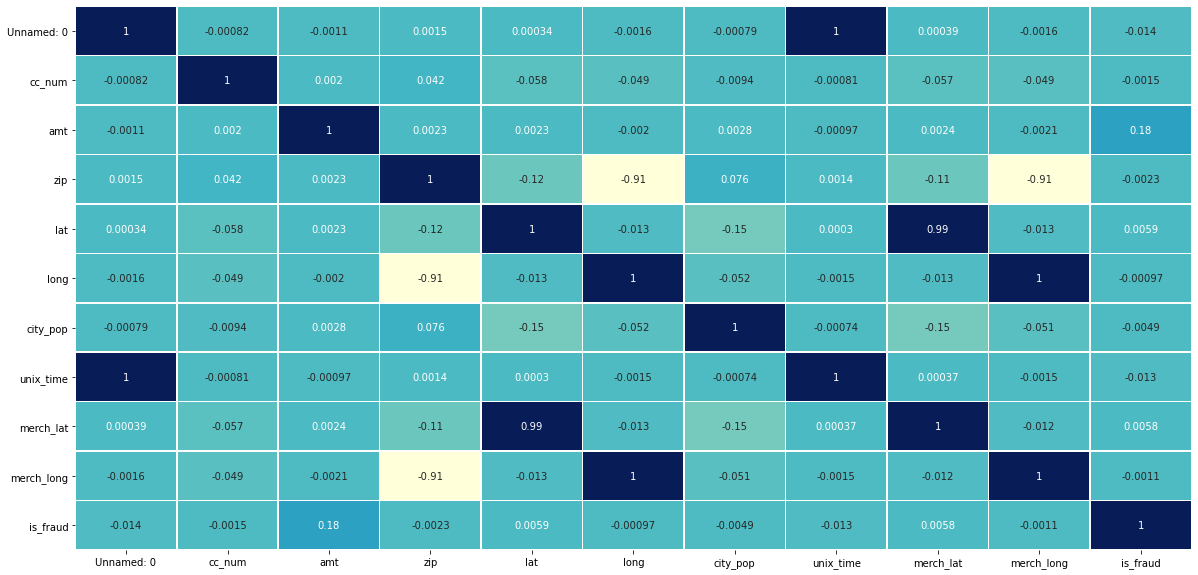

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cc_original_train_df.corr(),
            linewidths=.5,  
                 cmap="YlGnBu", 
                 cbar=False,
                 annot=True)
plt.show()

Nota: Para el mapa de calor el monto está altamente correlacionado con la cariable de is_fraud
    (Si El mapa de calor está próximo a 1 y similiar al blanco significa que el las variables cercanas al están altamente relacionadas)

### Preguntas a resolver
1. ¿Cuál es el género que presenta más transacciones fraudulentas?
2. ¿Cuál es la cantidad más alta relacionada al fraude?
3. ¿Cuál es el género que más ha sido estafado?
4. ¿Qué tipo de categoría ha sido más estafada?

In [64]:
cc_original_train_df.loc[cc_original_train_df['is_fraud'] == 1].sort_values('amt', ascending=False).head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
274178,274178,2020-09-30 23:41:38,180020605265701,"fraud_Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,1352f5f821b77b49df4bc2329e5e249e,1380584498,39.679602,-97.038867,1
155849,155849,2020-08-15 02:08:03,4634955908138648,fraud_Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,3f039e6f6df9f883e39f3b7b6b782a9c,1376532483,42.276801,-95.911843,1


### Respuestas
1. ¿Quién fue estafado con la mayor cantidad y cuál es el género?: **Meagan Edwards, Female**
2. ¿Cuánta cantidad que más ha sido estafada?: **$1376.04**

<AxesSubplot:title={'center':'Number of frauds by gender'}, xlabel='sex', ylabel='count'>

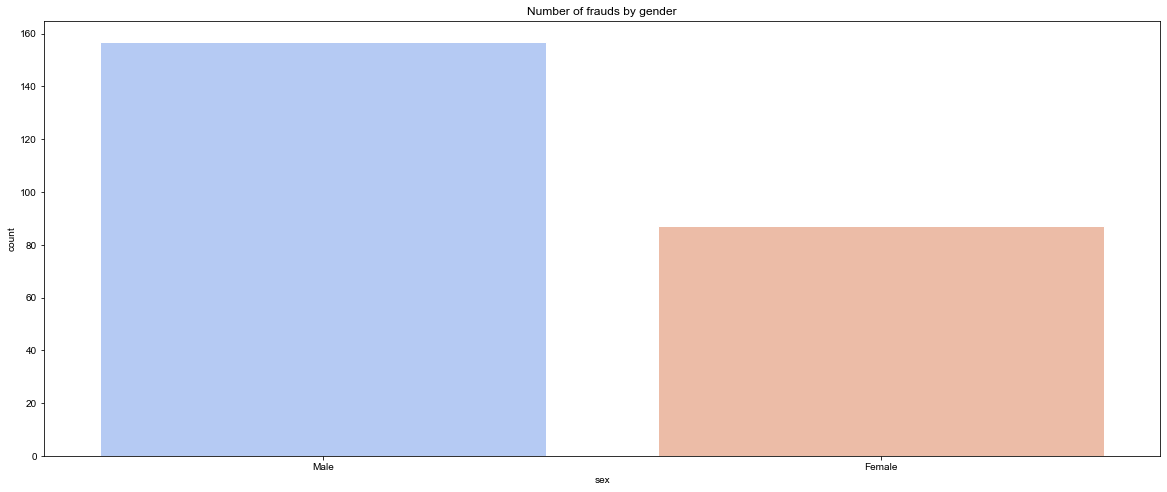

In [67]:
# Gender
plt.figure(figsize=(20,8))
plt.title('Number of frauds by gender')
sns.barplot(x="gender", y='is_fraud' ,data=cc_original_train_df)
tips = sns.load_dataset('tips')
sns.set_style('ticks')
sns.countplot(x ='sex', data = tips, palette = 'coolwarm')

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

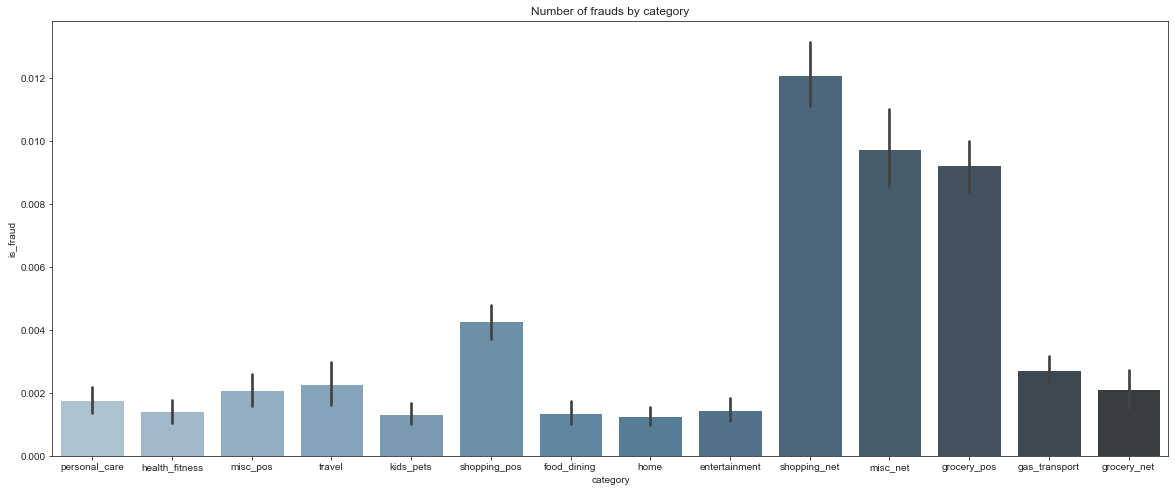

In [69]:
# Fraudes registrados por categoría
plt.figure(figsize=(20,8))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud',
            data=cc_original_train_df, 
                 palette="Blues_d", 
                    saturation=.5)

<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='category', ylabel='is_fraud'>

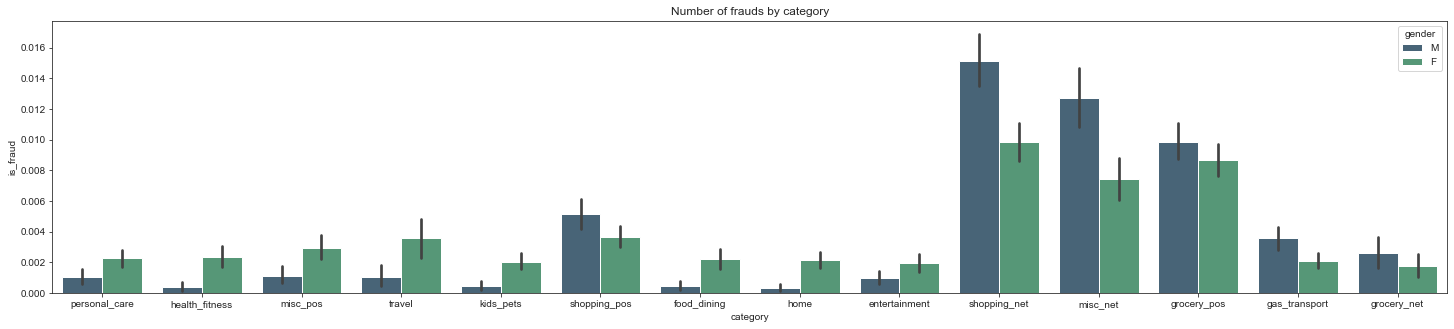

In [71]:
# Fraudes registrados por categoría y género
plt.figure(figsize=(25,5))
plt.title('Number of frauds by category')
sns.barplot(x="category", y='is_fraud',
             hue="gender",
                data=cc_original_train_df, 
                 palette="viridis", 
                    saturation=.5)

### Respuesta
    
¿Cuál es el género más estafado? Male

¿Cuál es la categoría más estafada?: shopping_net

In [72]:
cc_original_train_df['amt'].sample(n=20, replace=False)

324804      1.29
282402     73.14
125588     49.86
362704    144.97
253109     22.38
21677      57.22
73802      38.05
285329      7.92
454574     46.11
452882     49.53
104193    119.19
395895     31.02
294715      5.18
32986      12.17
391695     70.44
316968     25.11
329061     46.75
63258     136.43
209230     57.80
190569     15.45
Name: amt, dtype: float64

In [73]:
cc_original_train_df['amt'].sample(frac=0.1, replace=True)

176330      2.07
433773     50.68
12859      40.68
461293    135.67
489117     50.34
           ...  
95056      29.51
499593    123.13
503779     11.38
77428      11.60
414233      8.76
Name: amt, Length: 55572, dtype: float64

In [74]:
amt = cc_original_train_df['amt']

means = []

for i in range(1000):
    sample = amt.sample(n=50, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [75]:
cc_original_train_df.loc[cc_original_train_df['is_fraud'] == 1].sort_values('amt', ascending=False).head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
274178,274178,2020-09-30 23:41:38,180020605265701,"fraud_Daugherty, Pouros and Beahan",shopping_pos,1320.92,John,Lewis,M,7908 Derrick Mount,...,39.8616,-97.1825,314,Chemical engineer,2002-03-17,1352f5f821b77b49df4bc2329e5e249e,1380584498,39.679602,-97.038867,1
155849,155849,2020-08-15 02:08:03,4634955908138648,fraud_Botsford Ltd,shopping_pos,1319.97,Mackenzie,Smith,F,7178 Willis Drive,...,41.6414,-96.5232,1745,"Engineer, automotive",1973-12-26,3f039e6f6df9f883e39f3b7b6b782a9c,1376532483,42.276801,-95.911843,1


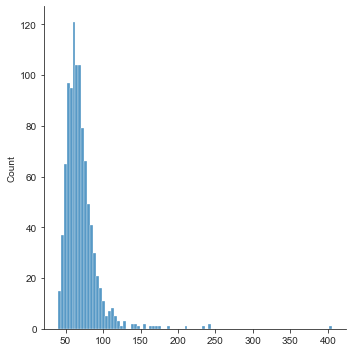

In [76]:
sns.displot(serie_means, kde=False);

In [77]:
serie_means.skew()

5.089079717474868

In [78]:
amt = cc_original_train_df['amt']

means = []

for i in range(100_000):
    sample = amt.sample(n=10000, replace=True)
    means.append(sample.mean())
    
serie_means = pd.Series(means)

In [79]:
print(f'Valor mínimo: {serie_means.min()}')
print(f'Valor máximo: {serie_means.max()}')
print(f'Rango: {serie_means.max() - serie_means.min()}')

Valor mínimo: 63.19385599999976
Valor máximo: 77.75138200000005
Rango: 14.557526000000287


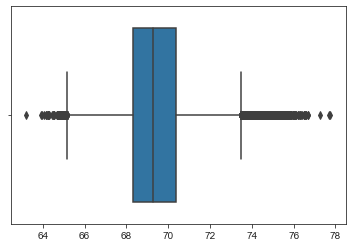

In [80]:
sns.boxplot(x=serie_means);

In [81]:
limite_inferior = serie_means.quantile(0.025)
limite_superior = serie_means.quantile(0.975)

In [82]:
print(f'Intervalo de 95% confianza de la media: {limite_inferior} < {amt.mean()} < {limite_superior}')

Intervalo de 95% confianza de la media: 66.55823222499971 < 69.39281023323066 < 72.72897254999971


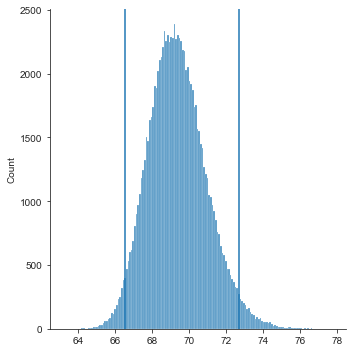

In [83]:
sns.displot(serie_means, kde=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior);

# Procesamiento
## Downsampling 
Utilizamos el método downsamplig para manejar el inbalance de los datos

In [89]:
print("Number of is_fraud data",cc_original_train_df['is_fraud'].value_counts())

Number of is_fraud data 0    553574
1      2145
Name: is_fraud, dtype: int64


is_fraud = 0 has 1289169 data

is_fraud = 1 has 7506 data

Dado a que la diferencia de las transacciones fraudulentas es muy alta, podría causar un inbalance de los datos

In [90]:
from sklearn.utils import resample 
df_minority = cc_original_train_df[cc_original_train_df.iloc[:,22].values==0] # .iloc[:,22] = is_fraud
df_majority = cc_original_train_df[cc_original_train_df.iloc[:,22].values==1] 
 
# Downsample clase mayoritaria
df_minority_downsampled = resample(df_minority,
                                 n_samples=7506,     #  clase minoritaria
                                 random_state=42)    # resultados
 
# Combinación de clase minoritaria aunada con la clase mayoritaria
df_downsampled = pd.concat([df_minority_downsampled, df_majority])
 
# Conteo de las nuevas clases
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 122448 to 517571
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             9651 non-null   int64  
 1   trans_date_trans_time  9651 non-null   object 
 2   cc_num                 9651 non-null   int64  
 3   merchant               9651 non-null   object 
 4   category               9651 non-null   object 
 5   amt                    9651 non-null   float64
 6   first                  9651 non-null   object 
 7   last                   9651 non-null   object 
 8   gender                 9651 non-null   object 
 9   street                 9651 non-null   object 
 10  city                   9651 non-null   object 
 11  state                  9651 non-null   object 
 12  zip                    9651 non-null   int64  
 13  lat                    9651 non-null   float64
 14  long                   9651 non-null   float64
 1

In [91]:
print("Number of is_fraud data",df_downsampled['is_fraud'].value_counts())

Number of is_fraud data 0    7506
1    2145
Name: is_fraud, dtype: int64


Se redujeron los datos para tomar el muestreo 

Note: Now is_fraud = 0 and is_fruad = 1 have amount = 7506 both

# Transformación de datos
## Dates 
nuevas columnas número_semana, número_mes, año por datos de transformación de la característica trans_date_trans_time

### Train Data

In [92]:
# Train data
# Cambiar la fecha para que sea tipo de fecha
df_downsampled['trans_date_trans_time'] = pd.to_datetime(df_downsampled['trans_date_trans_time'])
# Crear columna número de semana
df_downsampled['week_number'] = df_downsampled['trans_date_trans_time'].dt.dayofweek
assert df_downsampled['week_number'].max() == 6
# Crear columna número de mes
df_downsampled['month_number'] = df_downsampled['trans_date_trans_time'].dt.month
assert df_downsampled['month_number'].max() == 12
# Crear columna número del año
df_downsampled['year'] = df_downsampled['trans_date_trans_time'].dt.year
df_downsampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
122448,122448,2020-08-03 06:02:00,30404291151692,fraud_Spinka-Welch,grocery_net,70.58,Savannah,Lewis,F,537 Walker Freeway,...,Ambulance person,1993-10-25,95fc8214cdfdcd40ebea07d072c92534,1375509720,42.208895,-78.899876,0,0,8,2020
132472,132472,2020-08-06 14:01:45,4797297220948468262,"fraud_Witting, Beer and Ernser",home,20.24,Erica,Briggs,F,3310 Davidson Spurs Apt. 107,...,Counsellor,1991-03-13,0917ecafab94be737408439ea55bdc2b,1375797705,39.885695,-86.193981,0,3,8,2020
367529,367529,2020-11-10 16:59:39,3591919803438423,fraud_Flatley Group,misc_pos,8.61,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,9b4e2fe50a9375a9d370df944e110c9e,1384102779,29.314344,-81.717564,0,1,11,2020
260322,260322,2020-09-25 06:03:55,213107169859697,fraud_Schmitt Ltd,misc_net,28.74,Megan,Fernandez,F,77127 Paul Station Apt. 495,...,Insurance broker,1979-08-14,05e3fb364236af87924fc5efc541b4d7,1380089035,41.165646,-112.682863,0,4,9,2020
110698,110698,2020-07-29 14:02:41,374238209524200,"fraud_Kihn, Brakus and Goyette",personal_care,199.46,Daniel,Martinez,M,8510 Acevedo Burgs,...,Museum education officer,1942-04-03,d445305b041324cd91370bf24ab69422,1375106561,44.665148,-120.324245,0,2,7,2020


### Test Data

In [93]:
# Test Data
# Cambiar la fecha para que sea tipo de fecha
cc_original_test_df['trans_date_trans_time'] = pd.to_datetime(cc_original_test_df['trans_date_trans_time'])
# Crear columna número de semana
cc_original_test_df['week_number'] = cc_original_test_df['trans_date_trans_time'].dt.dayofweek
assert cc_original_test_df['week_number'].max() == 6
# Crear columna mes 
cc_original_test_df['month_number'] = cc_original_test_df['trans_date_trans_time'].dt.month
assert cc_original_test_df['month_number'].max() == 12
# Crear columna año
cc_original_test_df['year'] = cc_original_test_df['trans_date_trans_time'].dt.year
cc_original_test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,week_number,month_number,year
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,2019
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,2019
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,2019
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,2019
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,2019


## Categorías (One-Hot Endcoding)
La categoría son datos nominales que no pueden funcionar con el modelo, así que cambiaré la categoría a numérica por One Hot Encoding

### Train Data

In [95]:
category_onehot = pd.get_dummies(df_downsampled.category, prefix='category')
df_downsampled = df_downsampled.join(category_onehot)
df_downsampled.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
126,126,2020-06-21 12:54:28,38947654498698,"fraud_Baumbach, Strosin and Nicolas",shopping_pos,7.47,Lori,Rodriguez,F,12087 Michael Light,...,0,0,0,0,0,0,0,0,1,0
159,159,2020-06-21 13:06:10,3577663406369449,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,12.32,Cody,Hooper,M,7233 John Parks,...,0,1,0,0,0,0,0,0,0,0
215,215,2020-06-21 13:26:48,213156747557083,"fraud_Runte, Green and Emard",health_fitness,52.44,Adam,Santos,M,725 Jo Trace Apt. 102,...,0,1,0,0,0,0,0,0,0,0
294,294,2020-06-21 13:55:54,6011693194885790,fraud_Vandervort-Funk,grocery_pos,88.94,Victoria,Fleming,F,2807 Parker Station Suite 080,...,1,0,0,0,0,0,0,0,0,0
363,363,2020-06-21 14:16:38,3559679414981506,fraud_Crooks and Sons,personal_care,35.43,Olivia,Stephenson,F,292 Cassidy Oval,...,0,0,0,0,0,0,1,0,0,0


### Test Data

In [96]:
category_onehot_test_data = pd.get_dummies(cc_original_test_df.category, prefix='category')
cc_original_test_df = cc_original_test_df.join(category_onehot_test_data)
cc_original_test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,0,0,0,0,1,0,0,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1,0,0,0,0,0,0,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,0,0,0,0,0,0,0,0,0,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,0,0,0,0,0,0,0,0,0,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,0,0,0,0,0,1,0,0,0,0


## Gender
Cambiar género de nominal a numérico

In [ ]:
# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
cc_original_test_df['gender'] = cc_original_test_df['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())
print('Gender of test dataset', cc_original_test_df['gender'].value_counts())

## Merchant

Convertir mercancía en datos numéricos

In [ ]:
# Train data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x_train = df_downsampled['merchant']
df_downsampled['merchant_number'] = label_encoder.fit_transform(x_train)

# Test data
x_test = cc_original_test_df['merchant']
cc_original_test_df['merchant_number'] = label_encoder.fit_transform(x_test)

print('Merchant Number of train dataset',df_downsampled['merchant_number'])
print('Merchant Number of test dataset',cc_original_test_df['merchant_number'])

## Age
Encuentra la edad desde la fecha de nacimiento de los datos

In [ ]:
from datetime import date
def calculate_age(row):
    today = date.today()
    return today.year - row['dob'].year - ((today.month, today.day) < (row['dob'].month, row['dob'].day))

# Train data
df_downsampled['dob'] = pd.to_datetime(df_downsampled['dob'])
df_downsampled['age'] = df_downsampled['dob']
df_downsampled['age'] = df_downsampled.apply (lambda row: calculate_age(row), axis=1)

# Test data
cc_original_test_df['dob'] = pd.to_datetime(cc_original_test_df['dob'])
cc_original_test_df['age'] = cc_original_test_df['dob']
cc_original_test_df['age'] = cc_original_test_df.apply (lambda row: calculate_age(row), axis=1)

print('Age of train dataset', df_downsampled['age'].head(3))
print('Age of test dataset', cc_original_test_df['age'].head(3))

### Job
Convertir Job en datos numéricos

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Train data
x_train = df_downsampled['job']
df_downsampled['job_number'] = label_encoder.fit_transform(x_train)
print(df_downsampled['job_number'])

# Test data
x_test = cc_original_test_df['job']
cc_original_test_df['job_number'] = label_encoder.fit_transform(x_test)
print(cc_original_test_df['job_number'])

# Seleccionar datos
Para funciones seleccionadas, me gustaría hacer 2 experimentos: ExtraTreesClassifier, .abs().nlargest(), porque me gustaría encontrar la mejor predicción


In [113]:
# Deseleccionar datos convertidos
select_data = df_downsampled
select_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'week_number', 'month_number',
       'year', 'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'age', 'job_number'],
      dtype='object')

In [115]:
select_data = select_data[['cc_num',
       'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'age', 'job_number',
       'week_number', 'month_number', 'year', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel','is_fraud']]
select_data.head()

,cc_num,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,is_fraud
126,38947654498698,7.47,0,45622,39.3543,-82.5030,321,1371819268,39.087656,-82.268046,...,0,0,0,0,0,0,0,1,0,0
159,3577663406369449,12.32,1,72354,35.6069,-90.3359,2470,1371819970,36.366507,-89.559427,...,1,0,0,0,0,0,0,0,0,0
215,213156747557083,52.44,1,91206,34.1556,-118.2322,172817,1371821208,34.377103,-119.191051,...,1,0,0,0,0,0,0,0,0,0
294,6011693194885790,88.94,0,55080,45.6675,-93.2433,2607,1371822954,44.996837,-93.055743,...,0,0,0,0,0,0,0,0,0,0
363,3559679414981506,35.43,0,13367,43.7893,-75.4156,8830,1371824198,42.870970,-75.368073,...,0,0,0,0,0,1,0,0,0,0


## ExtraTreesClassifier

[2.33396598e-03 9.08609352e-02 2.59516978e-03 2.35823481e-03
 2.54132387e-03 2.32896387e-03 1.89299261e-03 4.95227873e-03
 2.25894001e-03 2.22746674e-03 3.26398029e-03 3.23281453e-03
 3.23788237e-03 4.94806630e-03 0.00000000e+00 1.44774309e-03
 1.16081956e-03 1.40474166e-03 3.62782729e-04 1.15343839e-02
 9.33409818e-04 2.04760953e-03 2.28954301e-03 6.21241437e-03
 6.71287177e-04 6.69015608e-04 1.95842469e-02 1.30084253e-03
 9.39184684e-04 8.20408960e-01]


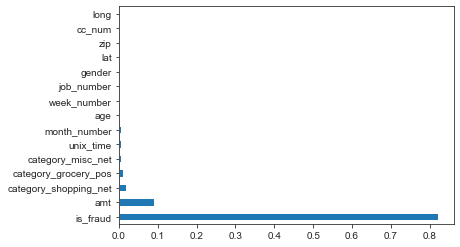

In [116]:
X = select_data.iloc[:,0:31]  #independent columns
y = select_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## nlargest

In [117]:
print(select_data.corr().abs().nlargest(15, 'is_fraud').index)

Index(['is_fraud', 'amt', 'category_shopping_net', 'category_grocery_pos',
       'category_misc_net', 'category_home', 'unix_time', 'category_kids_pets',
       'category_entertainment', 'month_number', 'category_food_dining',
       'week_number', 'category_health_fitness', 'category_personal_care',
       'age'],
      dtype='object')


In [118]:
#Seleccionar Train Data
select_data_train_extra_tree = df_downsampled[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_train_abs_nlargest = df_downsampled[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [119]:
#Seleccionar Test Data
select_data_test_extra_tree = cc_original_test_df[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos','is_fraud']]

select_data_test_abs_nlargest = cc_original_test_df[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender','is_fraud']]

In [120]:
# Perparar X_train y_train
X_train_extra_tree = select_data_train_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_train_extra_tree = select_data_train_extra_tree['is_fraud']

X_train_abs_nlargest = select_data_train_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_train_abs_nlargest = select_data_train_abs_nlargest['is_fraud']

In [121]:
# Preparar X_test y_test
X_test_extra_tree = select_data_test_extra_tree[['amt','category_shopping_net','category_grocery_pos','category_home','category_misc_net',
                                         'category_kids_pets','category_health_fitness','gender','age','month_number',
                                         'category_food_dining','unix_time','category_personal_care','category_shopping_pos']]
y_test_extra_tree = select_data_test_extra_tree['is_fraud']

X_test_abs_nlargest = select_data_test_abs_nlargest[['amt', 'category_shopping_net', 'category_grocery_pos',
                                        'category_home', 'category_misc_net', 'category_kids_pets',
                                        'category_health_fitness', 'category_food_dining',
                                        'category_personal_care', 'month_number', 'category_entertainment',
                                        'age', 'category_misc_pos', 'gender']]
y_test_abs_nlargest = select_data_test_abs_nlargest['is_fraud']

# Scaler

In [123]:
from sklearn import preprocessing

### Scaler Train Data

In [124]:
# Scale X_train
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_extra_tree)
X_train_extra_tree_scaler = pd.DataFrame(newValue, columns=X_train_extra_tree.columns)
X_train_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.001426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3125,0.0,0.0,0.000000,0.0,1.0
1,0.002495,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.4500,0.0,0.0,0.000042,0.0,0.0
2,0.011339,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.2750,0.0,0.0,0.000116,0.0,0.0
3,0.019385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.1125,0.0,0.0,0.000221,0.0,0.0
4,0.007590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1625,0.0,0.0,0.000295,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3500,1.0,0.0,0.999819,0.0,1.0
9741,0.046732,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.1250,1.0,0.0,0.999824,0.0,0.0
9742,0.007325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4000,1.0,0.0,0.999839,0.0,0.0
9743,0.002449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5000,1.0,0.0,0.999927,0.0,0.0


In [125]:
# Abs
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_abs_nlargest)
X_train_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_train_abs_nlargest.columns)
X_train_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.001426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3125,0.0,0.0
1,0.002495,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.4500,0.0,1.0
2,0.011339,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.2750,0.0,1.0
3,0.019385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1125,0.0,0.0
4,0.007590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1625,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,0.000037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.3500,0.0,0.0
9741,0.046732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.1250,1.0,1.0
9742,0.007325,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.4000,0.0,0.0
9743,0.002449,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5000,0.0,0.0


### Scaler Test Data

In [126]:
# Scale X_test
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_extra_tree)
X_test_extra_tree_scaler = pd.DataFrame(newValue, columns=X_test_extra_tree.columns)
X_test_extra_tree_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,gender,age,month_number,category_food_dining,unix_time,category_personal_care,category_shopping_pos
0,0.000137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.2000,0.000000,0.0,0.000000e+00,0.0,0.0
1,0.003670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3250,0.000000,0.0,5.598526e-07,0.0,0.0
2,0.007569,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5375,0.000000,0.0,7.105821e-07,0.0,0.0
3,0.001520,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4750,0.000000,0.0,1.248902e-06,0.0,0.0
4,0.001415,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2250,0.000000,0.0,3.617509e-06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0.000503,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5375,0.454545,0.0,9.999981e-01,0.0,0.0
1296671,0.001751,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3125,0.454545,1.0,9.999983e-01,0.0,0.0
1296672,0.003625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.4625,0.454545,1.0,9.999986e-01,0.0,0.0
1296673,0.002553,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.3000,0.454545,1.0,1.000000e+00,0.0,0.0


In [127]:
# nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_abs_nlargest)
X_test_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_test_abs_nlargest.columns)
X_test_abs_nlargest_scaler

,amt,category_shopping_net,category_grocery_pos,category_home,category_misc_net,category_kids_pets,category_health_fitness,category_food_dining,category_personal_care,month_number,category_entertainment,age,category_misc_pos,gender
0,0.000137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2000,0.0,0.0
1,0.003670,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.3250,0.0,0.0
2,0.007569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.5375,0.0,1.0
3,0.001520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.4750,0.0,1.0
4,0.001415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2250,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0.000503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,1.0,0.5375,0.0,1.0
1296671,0.001751,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.0,0.3125,0.0,1.0
1296672,0.003625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.0,0.4625,0.0,1.0
1296673,0.002553,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.454545,0.0,0.3000,0.0,1.0


# Modelo de Regresión Logística

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=42)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

LogisticRegression(random_state=42)

In [130]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [131]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

Select Data By Extra Tree
                 Predicted Positive  Predicted Nagative
Actual Positive             1288880                 289
Actual Negative                7506                   0
Select Data By Abs nlargest
                 Predicted Positive  Predicted Nagative
Actual Positive             1288850                 319
Actual Negative                7506                   0


In [132]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675

Classification report (Select Data By Abs nlargest)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.99   1296675
   macro avg       0.50      0.50      0.50   1296675
weighted avg       0.99      0.99      0.99   1296675



## Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42)

# Extra Tree - Fit Model
dt_clf.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest - Fit Model
dt_clf.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

DecisionTreeClassifier(max_depth=20, random_state=42)

In [135]:
#Extra Tree - Confusion matrix
print("Confusion Matrix(Select Data By Extra Tree)")
pred_test_extrea_tree_scaler = dt_clf.predict(X_test_extra_tree_scaler)
pd.DataFrame(confusion_matrix(y_test_extra_tree,pred_test_extrea_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Extra Tree)


,Predicted Positive,Predicted Nagative
Actual Positive,1182264,106905
Actual Negative,6932,574


In [136]:
# nlargest - Confusion matrix
print("Confusion Matrix(Select Data By Abs nlargest)")
pred_test_abs_nlargest_scaler = dt_clf.predict(X_test_abs_nlargest_scaler)
pd.DataFrame(confusion_matrix(y_test_abs_nlargest,pred_test_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix(Select Data By Abs nlargest)


,Predicted Positive,Predicted Nagative
Actual Positive,1110818,178351
Actual Negative,7486,20


In [137]:
# Extra Tree - Classification report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, pred_test_extrea_tree_scaler))


# nlargest - Classification report
print("Classification report (Select Data By nlargest)")
print(classification_report(y_test_abs_nlargest, pred_test_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       0.99      0.92      0.95   1289169
           1       0.01      0.08      0.01      7506

    accuracy                           0.91   1296675
   macro avg       0.50      0.50      0.48   1296675
weighted avg       0.99      0.91      0.95   1296675

Classification report (Select Data By nlargest)
              precision    recall  f1-score   support

           0       0.99      0.86      0.92   1289169
           1       0.00      0.00      0.00      7506

    accuracy                           0.86   1296675
   macro avg       0.50      0.43      0.46   1296675
weighted avg       0.99      0.86      0.92   1296675



## Conclusión
La mejor precisión de 4 modelos es un árbol de decisiones y los datos de selección son los más grandes con un 95 %
y tiene el mejor Verdadero Positivo pero para Verdadero Negativo tiene un valor menor que LogisticRegression pero f1-score tiene un poco diferente. Por lo tanto, el árbol de decisión y los datos de selección son los mejores en este proyecto.